# MINIMIZING CHURN RATE THROUGH ANALYSIS OF FINANCIAL HABITS

## Importing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('datasets/churn_data.csv')

## EDA

In [17]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [19]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


#### Cleaning dataset

In [4]:
dataset[dataset.credit_score < 300]
dataset = dataset[dataset.credit_score >= 300]

#### NaN values

In [21]:
dataset.isna().any()

user                       False
churn                      False
age                        False
housing                    False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
dataset = dataset.drop(['rewards_earned','credit_score'],axis=1)

## Visualisation

#### Histograms

In [23]:
dataset2 = dataset.drop(['user','churn'],axis=1)

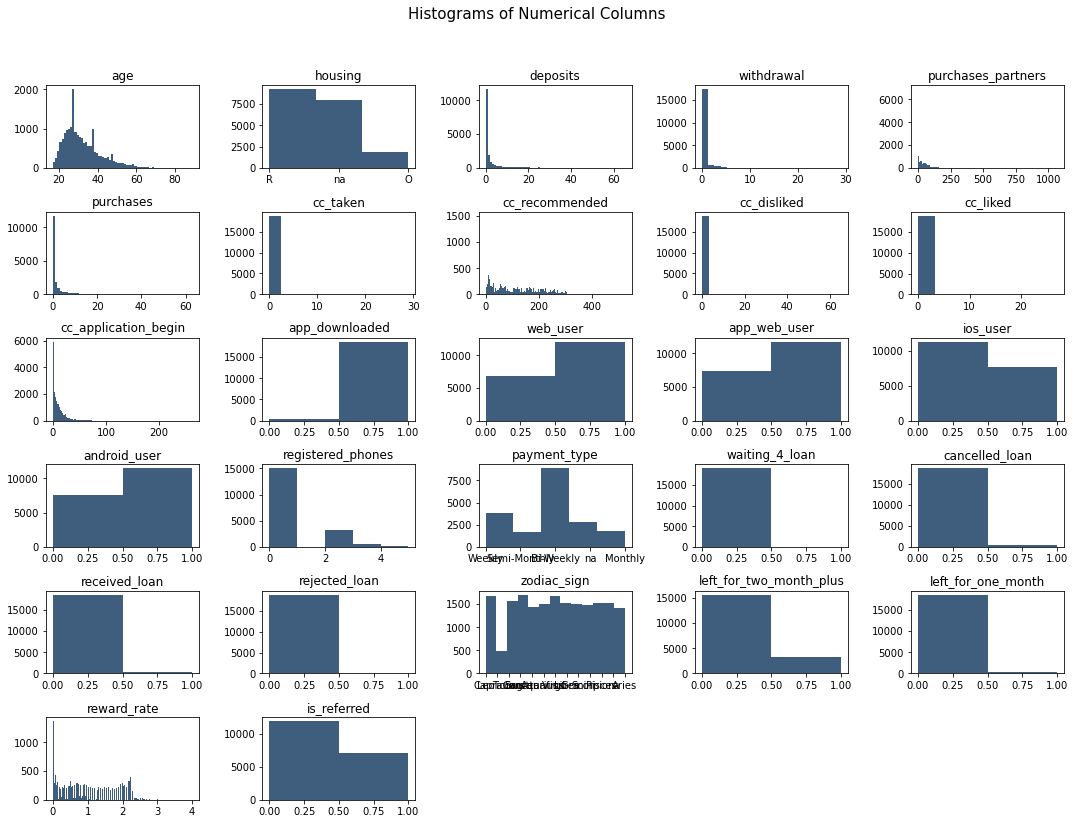

In [24]:
fig = plt.figure(figsize=(15,12))

plt.suptitle('Histograms of Numerical Columns', fontsize=15)

for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D',)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### Pie Charts

In [25]:
cat_cols = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

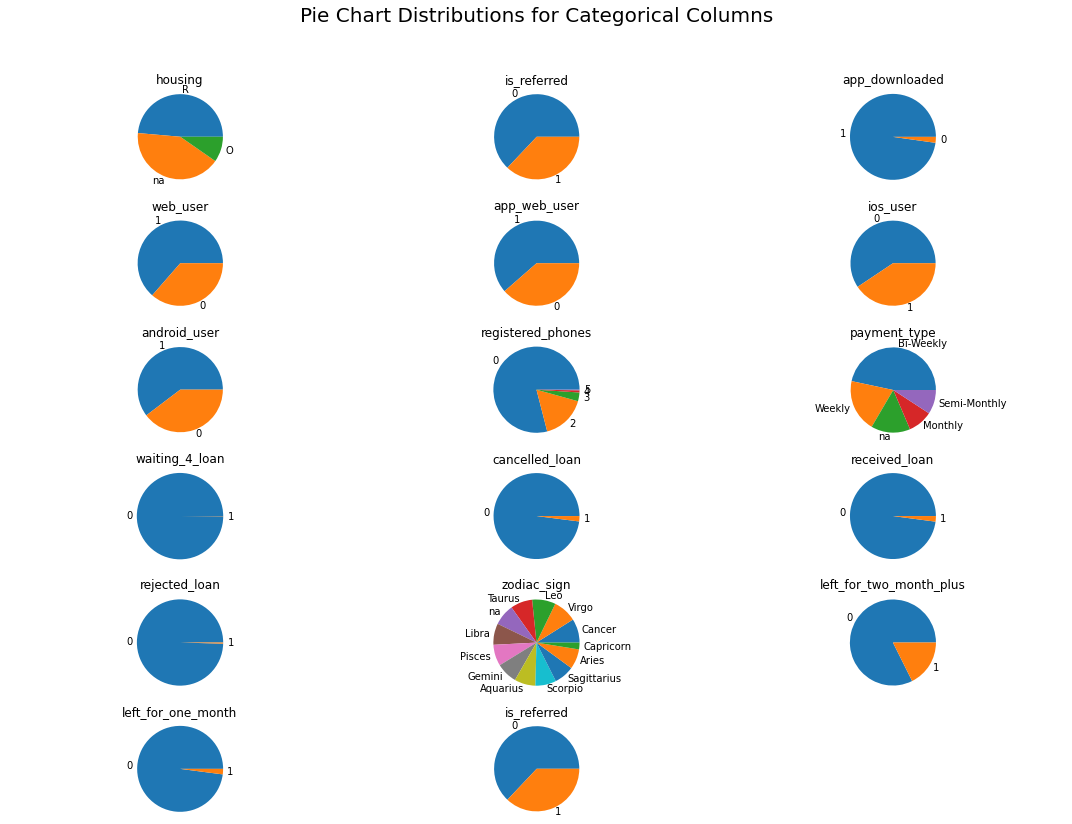

In [26]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions for Categorical Columns', fontsize=20)
for i in range(1, cat_cols.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(cat_cols.columns.values[i - 1])
   
    values = cat_cols.iloc[:, i - 1].value_counts().values
    index = cat_cols.iloc[:, i - 1].value_counts().index
    plt.pie(values, labels = index)
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Exploring Uneven Features (enables to prevent biased outcomes)

In [28]:
dataset[cat_cols.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [29]:
dataset[cat_cols.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [30]:
dataset[cat_cols.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [31]:
dataset[cat_cols.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [32]:
dataset[cat_cols.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### Correlation plots

Correlation of each of the independent variables with the dependent variable. In other words, which features impact the model the most?

To work this out, we can only use the numerical and binary variables (no categorical variables). So let's create a dataset with those variables only:

<AxesSubplot:title={'center':'Correlation with Response variable'}>

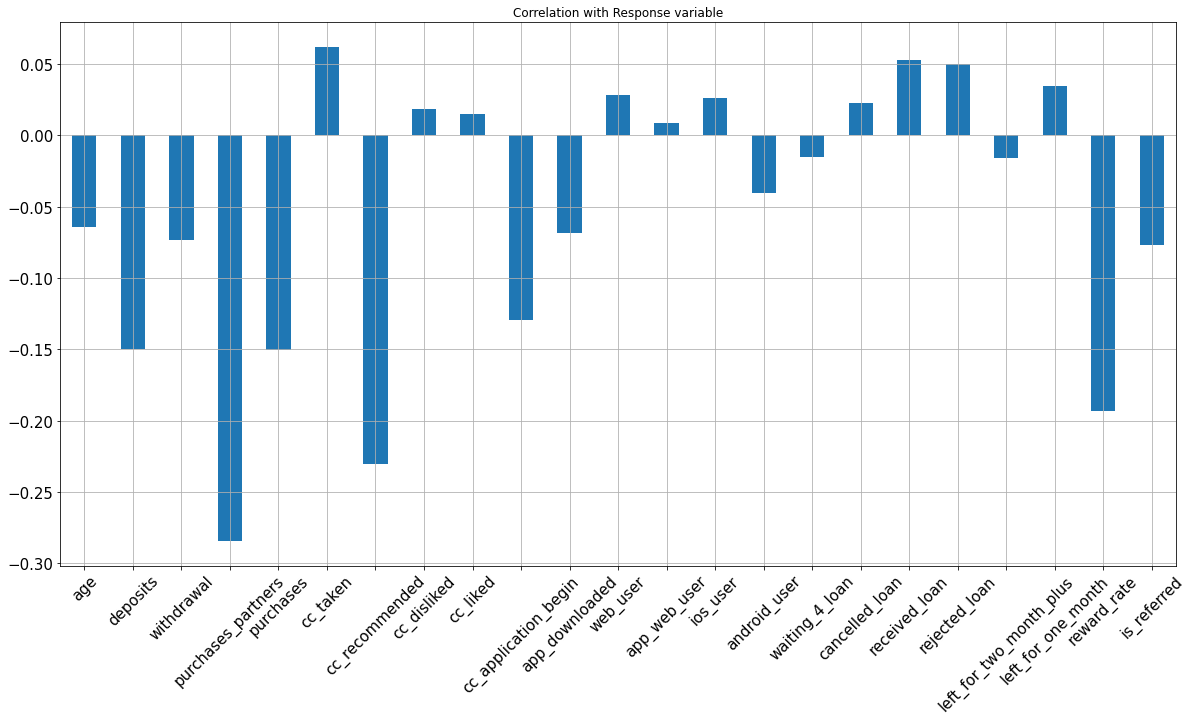

In [31]:
dataset2.drop(['housing', 'payment_type','registered_phones', 'zodiac_sign'],axis=1).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

### Correlation matrix

Let's check the correlation of the independent variables one with another.

<AxesSubplot:>

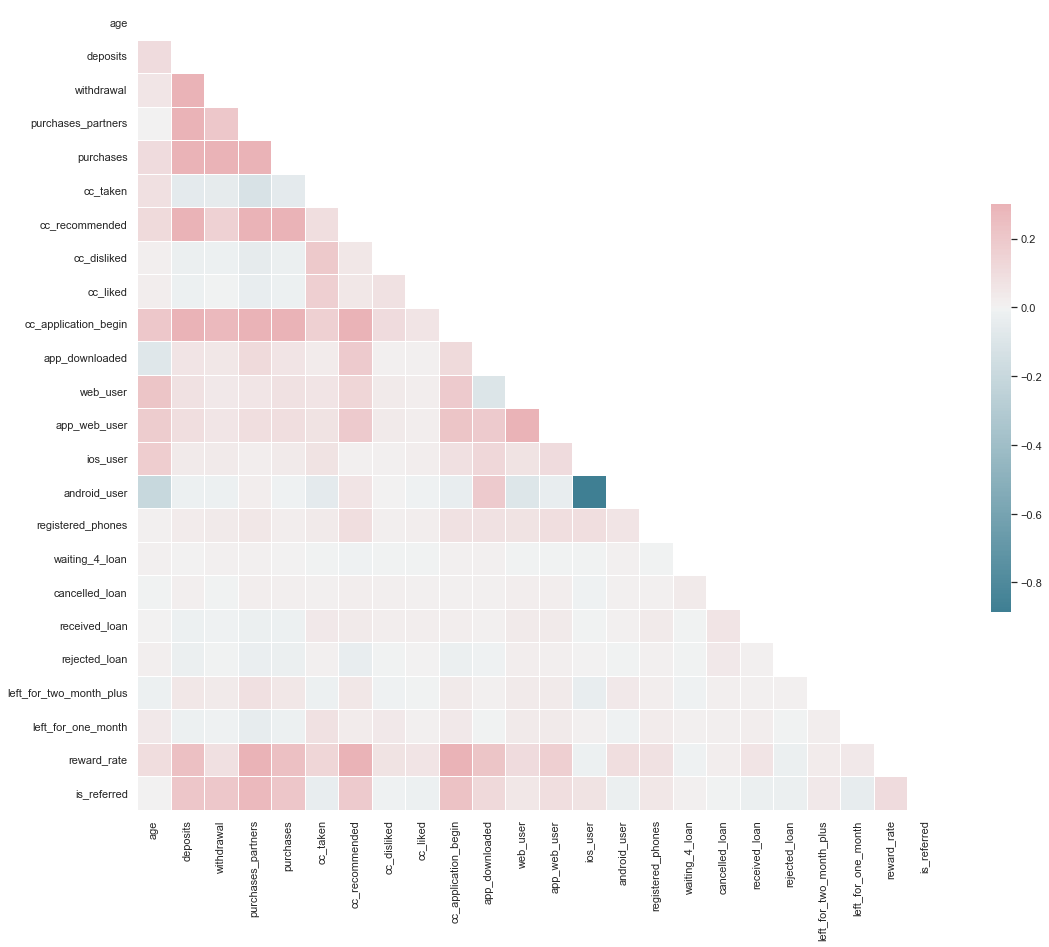

In [34]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr() # using every column execpt the dependent and the 'user' variables

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Here, the optimal correlation matrix would be showing a correlation of 0 between each of the variable which would mean that each variable here is independent from all other variables. In that way, we could see the direct relationship of each independent variable with the dependent variable. Unfortunetely, that usually doesn't happen. 

Here we can see for example that IOS user and Android user are highly negatively correlated. This obviously makes sense since customers usually don't have both operating systems. The solution here would be to drop one of those columns and use a dummy variable instead.

app_web_user is a function of app_user and web_user : if both are = to 1, then app_web_user will be = to 1. Hence, this variable is not independent. She should drop this column for further analysis. 

In [6]:
dataset = dataset.drop(columns = ['app_web_user'])

In [7]:
dataset.to_csv('datasets/new_churn_data.csv', index = False)

## Model Preparation

In [120]:
df = pd.read_csv('datasets/new_churn_data.csv')

Data Preparation :

In [121]:
user_identifier = df['user']
df = df.drop(columns = ['user'])

### One-Hot Encoding

The function of One-Hot Encoding is to transform categorical variables into dummy variables.
In essence, it divides one column into new columns based on each of the different category for this variable.

In [122]:
df = pd.get_dummies(df)

In [123]:
df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [124]:
# Removing one base variable for each dummy variable. We can also do so by adding the argument: dummy_na: 'bool' = False
df = df.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na']) 

### Train Test Split

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'churn'), df['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

### Balancing the Training Set, or Stratification

Here we want to have a balanced number of churn values (1s and 0s)

In [126]:
y_train.value_counts()

0    8934
1    6238
Name: churn, dtype: int64

In [127]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [128]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [129]:
import random

random.seed(0)
higher = np.random.choice(higher, size=len(lower)) # making the number of 'higher' values the same as 'lower' 
# values by chopping some of them
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher)) # new indexes made of the combination of higher and lower indexes, 
# both of which have now the same size

In [130]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

### Feature Scaling, aka normalizing numerical fields

In [131]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) # The tranform function turns the result into a numpy array which 
# loses its index and the column, this is why here we turn it back into a DataFrame 
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model Building

### Fitting Model to the Training Set

In [132]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) # it is a classification problem so we use the classifier model
classifier.fit(X_train, y_train) # fitting the model to the training set

LogisticRegression(random_state=0)

### Predicting Test Set

In [133]:
y_pred = classifier.predict(X_test)

### Evaluating Results

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [135]:
cm = confusion_matrix(y_test, y_pred) # we will plot it later on

In [136]:
accuracy_score(y_test, y_pred)

0.6411811231215396

In [137]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.5474317445627025

In [138]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7554278416347382

When we have a decent accuracy but a poor precision and a high recall, we use f1 score to give a better measure of how our model is performing.

In [139]:
f1_score(y_test, y_pred)

0.6348269385564799

Plotting the confusing matrix :

Test Data Accuracy: 0.6412


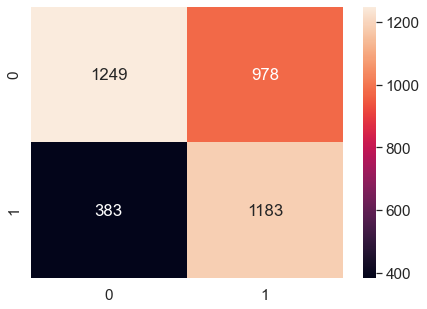

In [140]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Applying k-Fold Cross Validation

In [141]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.659 (+/- 0.035)


### Analyzing Coefficients

In [142]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.189091
1,deposits,0.229092
2,withdrawal,0.016899
3,purchases_partners,-0.748288
4,purchases,-0.355702
5,cc_taken,0.054912
6,cc_recommended,0.046144
7,cc_disliked,0.000509
8,cc_liked,-0.027992
9,cc_application_begin,0.046823


## Feature Selection

### Recursive Feature Elimination

In [143]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Model to test

In [144]:
classifier = LogisticRegression()

#### Select Best X Features

In [145]:
X_train.shape

(12476, 41)

In [146]:
rfe = RFE(classifier, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

#### Summarize the selection of the attributes

We want to know which features/columns are included in the final result or not as well as their importance ranking.

In [147]:
print(rfe.support_)

[ True  True False  True  True  True False False False  True  True  True
  True False  True False  True  True  True False False  True  True False
  True  True  True  True False False False False  True False False False
 False False False False False]


In [148]:
print(rfe.ranking_)

[ 1  1 16  1  1  1  5 21  9  1  1  1  1  2  1  3  1  1  1 10 11  1  1  7
  1  1  1  1 12 19  6  8  1 20 22 14  4 17 18 13 15]


In [149]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'reward_rate', 'is_referred', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'zodiac_sign_Capricorn'],
      dtype='object')

### Fitting the new Model to the Training Set

In [150]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression()

### Predicting Test Set

In [151]:
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

### Evaluating Results

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [153]:
accuracy_score(y_test, y_pred)

0.6388083311363038

In [154]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.5449954086317723

In [155]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7579821200510856

In [156]:
f1_score(y_test, y_pred)

0.6340811965811967

Plotting the confusion matrix :

Test Data Accuracy: 0.6388


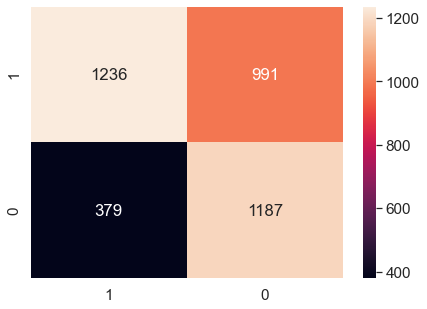

In [157]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Pretty similar results than the original model.

Here, we have demonstrated that 21 features no no impact on the outcome.

### Applying k-Fold Cross Validation

In [158]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.658 (+/- 0.034)


### Analysing coefficients

In [159]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.191032
1,deposits,0.225682
2,purchases_partners,-0.733080
3,purchases,-0.342926
4,cc_taken,0.050881
5,cc_application_begin,0.054568
6,app_downloaded,-0.066669
7,web_user,0.158865
8,ios_user,0.108822
9,registered_phones,0.089174


Although the coefficients haven't change much, the overall average is higher because we got rid of 20 columns that have very low coefficients (aka have very low importance).

## Formatting Final Results

In [160]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user','churn', 'predicted_churn']].reset_index(drop=True)

In [161]:
final_results

,user,churn,predicted_churn
0,20839,0.0,1
1,15359,1.0,0
2,34210,1.0,0
3,57608,1.0,1
4,11790,0.0,0
...,...,...,...
3788,67681,0.0,1
3789,49145,1.0,0
3790,47206,0.0,0
3791,22377,0.0,0
